 This dataset describes the medical records for Pima Indians
 and whether or not each patient will have an onset of diabetes within five years. As such it
 is a classification problem. It is a good dataset for demonstration because all of the input
 attributes are numeric and the output variable to be predicted is binary (0 or 1).

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### with Existing csv file

In [34]:
data=pd.read_csv('diabetes.csv', delimiter=',',quoting=csv.QUOTE_NONE)
data.head()
data.shape

(768, 9)

### loading data using url

In [35]:
import pandas as pd

url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
data = pd.read_csv(url)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data.columns=names
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

### describe function gives 8 statistical properties of each attribute

 ˆCount.

 ˆ Mean.

 ˆ Standard Deviation.

 ˆ Minimum Value.

 ˆ 25th Percentile.

 ˆ 50th Percentile (Median).

 ˆ 75th Percentile.
 
 ˆ Maximum Value

In [38]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###  Class Distribution (Classification Only)
to check if the data is highly imbalanced or not

In [39]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

Correlation refers to the relationship between two variables and how they may or may not
change together. The most common method for calculating correlation is Pearsons Correlation
Coefficient, that assumes a normal distribution of the attributes involved.
 A correlation of-1
 or 1 shows a full n

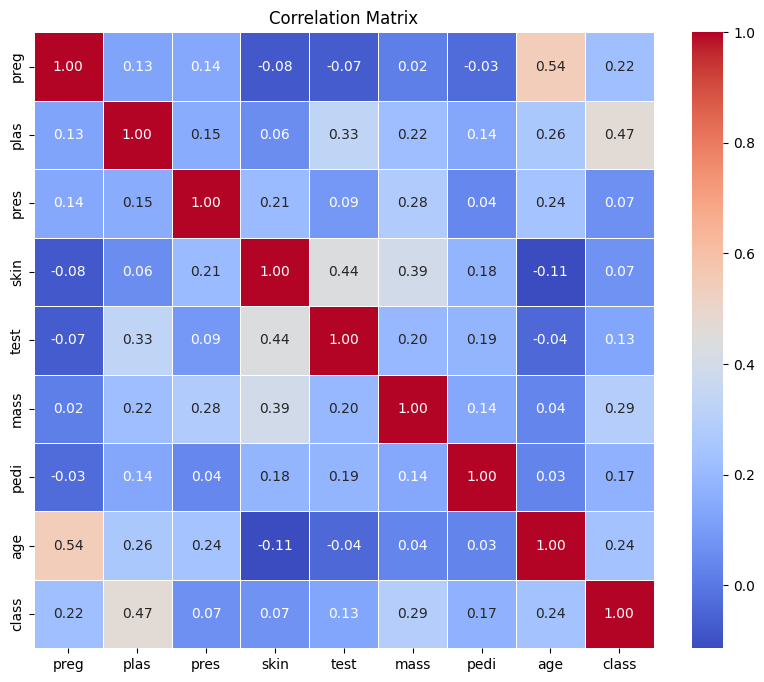

In [40]:
from pandas import set_option
set_option('display.width', 100)
# the maximum number of characters per line when displaying pandas output in the console or notebook.
# set_option('precision', 3)
# This line calculates the correlation matrix for your dataset using the Pearson correlation coefficient (default method)
correlations=data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Skew of Univariate Distributions
Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. 
The skew result show a positive (right) or negative (left) skew. 

In [41]:
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

## Univariate Plots

analyzing every features separately

ˆ Histograms.

ˆ Density Plots.

ˆ Box and Whisker Plots.

When we use **univariate techniques**, our goal is to understand how a **single variable** behaves — how its values are distributed. Based on the **shape** of that distribution, we might compare it to well-known **theoretical distributions** like:

---

## 🎯 Common Distributions in Univariate Analysis

| Distribution               | Shape                                        | Use Case / Meaning                                                          |
| -------------------------- | -------------------------------------------- | --------------------------------------------------------------------------- |
| **Gaussian (Normal)**      | Bell-shaped, symmetric                       | Most natural phenomena (e.g., height, IQ, weight) follow this               |
| **Exponential**            | Right-skewed (high on left, tails off right) | Time between events in a Poisson process (e.g., time until next earthquake) |
| **Uniform**                | Flat                                         | All outcomes equally likely (e.g., rolling a fair die)                      |
| **Skewed (Left or Right)** | Asymmetric                                   | Income, prices, survival times, etc.                                        |
| **Bimodal**                | Two peaks                                    | Two distinct groups (e.g., male/female heights)                             |

---

## Histograms

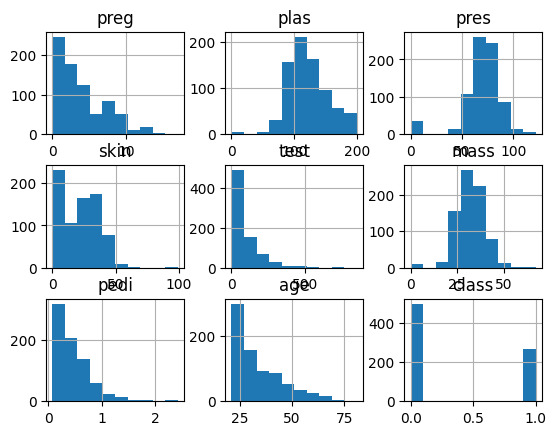

In [42]:
data.hist()
plt.show()

We can see that perhaps the attributes age, pedi and test may have an exponential
 distribution. We can also see that perhaps the mass and pres and plas attributes may have a
 Gaussian or nearly Gaussian distribution. This is interesting because many machine learning
 techniques assume a Gaussian univariate distribution on the input variables.

## Density plots

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\3409451597.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['preg'], shade=True)


<Axes: xlabel='preg', ylabel='Density'>

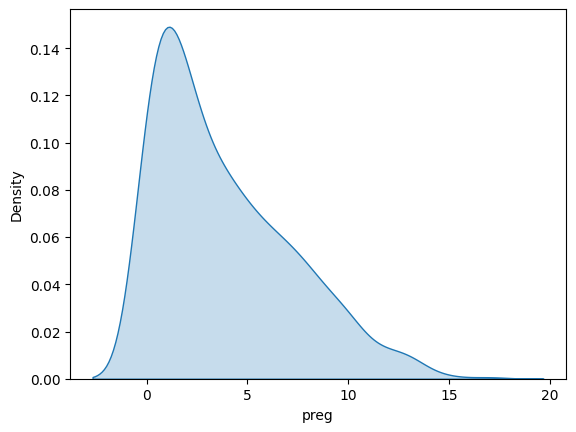

In [43]:
# seaborn has in built library function kdeplot
sns.kdeplot(data['preg'], shade=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\245580421.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['plas'], shade=True)


<Axes: xlabel='plas', ylabel='Density'>

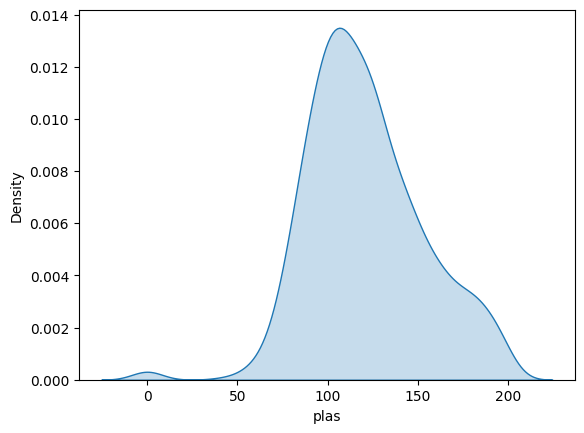

In [44]:
sns.kdeplot(data['plas'], shade=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\374242910.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['pres'], shade=True)


<Axes: xlabel='pres', ylabel='Density'>

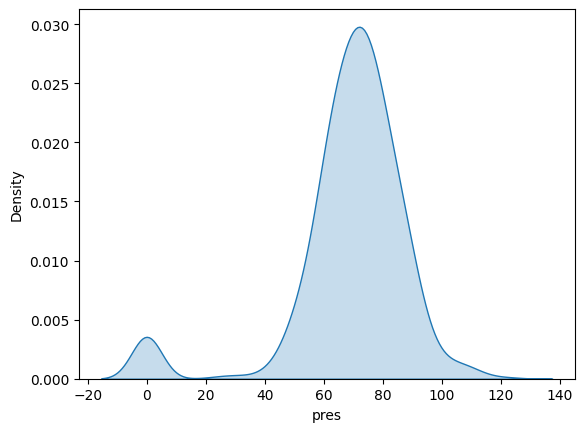

In [45]:
sns.kdeplot(data['pres'], shade=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\1930096927.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['skin'], shade=True)


<Axes: xlabel='skin', ylabel='Density'>

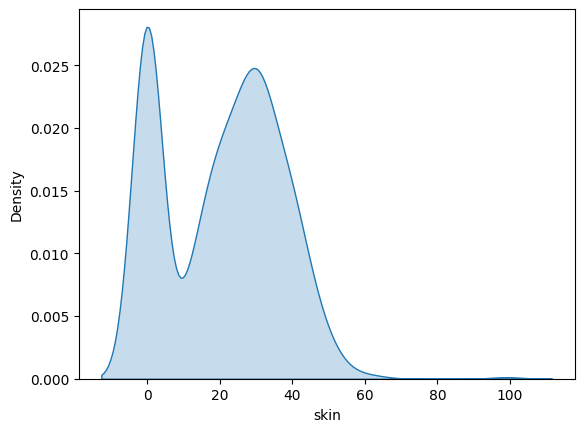

In [46]:
sns.kdeplot(data['skin'], shade=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\1493518855.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['test'], shade=True)


<Axes: xlabel='test', ylabel='Density'>

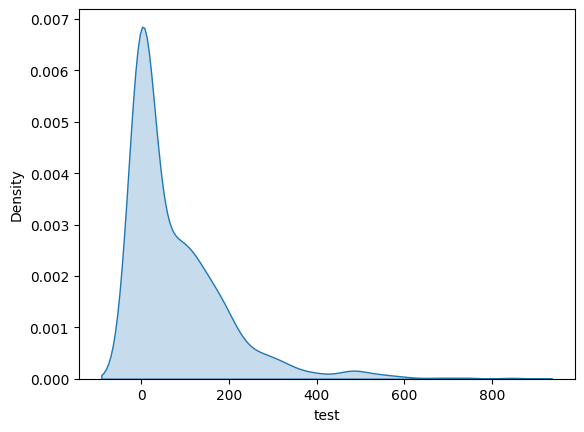

In [47]:
sns.kdeplot(data['test'], shade=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\1991220161.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mass'], shade=True)


<Axes: xlabel='mass', ylabel='Density'>

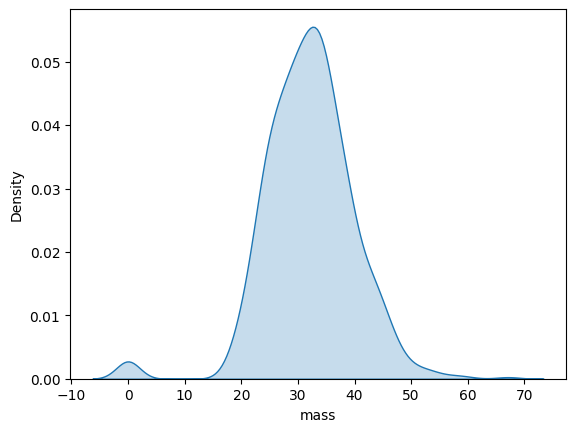

In [48]:
sns.kdeplot(data['mass'], shade=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_13264\1522884137.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['pedi'], shade=True)


<Axes: xlabel='pedi', ylabel='Density'>

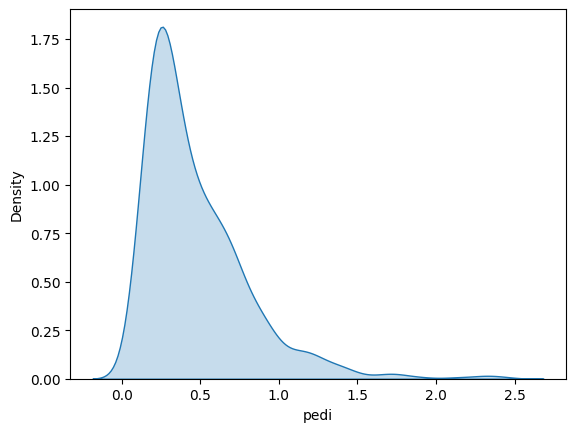

In [49]:
sns.kdeplot(data['pedi'], shade=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\3075458311.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], shade=True)


<Axes: xlabel='age', ylabel='Density'>

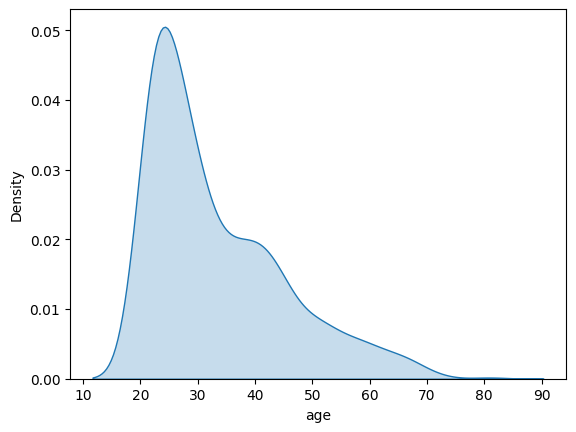

In [50]:
sns.kdeplot(data['age'], shade=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\1306178151.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['class'], shade=True)


<Axes: xlabel='class', ylabel='Density'>

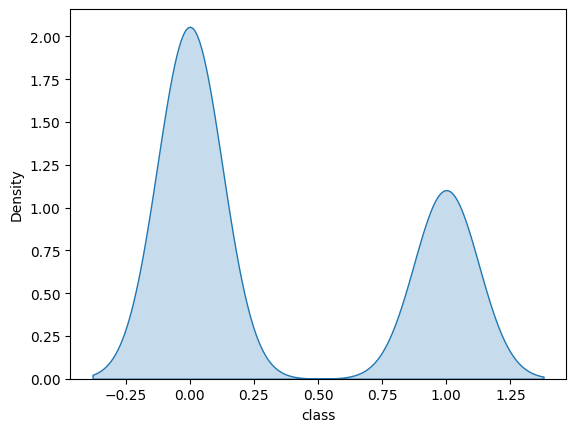

In [51]:
sns.kdeplot(data['class'], shade=True)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

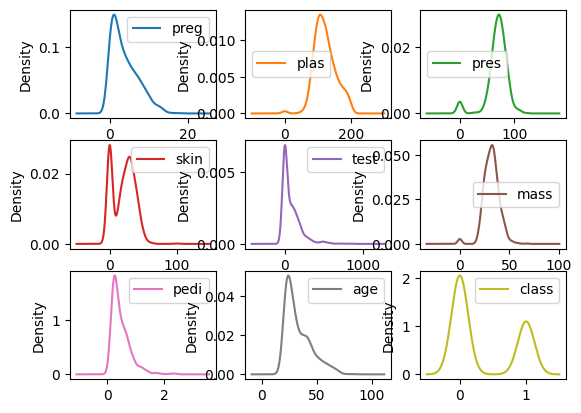

In [52]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False)

### BOX and Whisker Plots

preg        Axes(0.125,0.653529;0.227941x0.226471)
plas     Axes(0.398529,0.653529;0.227941x0.226471)
pres     Axes(0.672059,0.653529;0.227941x0.226471)
skin        Axes(0.125,0.381765;0.227941x0.226471)
test     Axes(0.398529,0.381765;0.227941x0.226471)
mass     Axes(0.672059,0.381765;0.227941x0.226471)
pedi            Axes(0.125,0.11;0.227941x0.226471)
age          Axes(0.398529,0.11;0.227941x0.226471)
class        Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

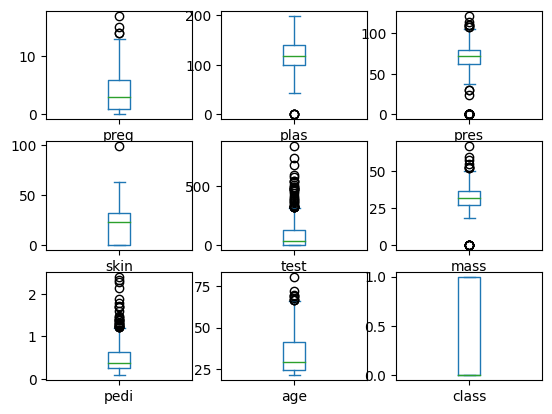

In [53]:
data.plot(kind='box',subplots=True, layout=(3,3),sharex=False,sharey=False)

## Multivariate Plot
Analysis involving two or more variables to examine relationships or patterns.

ˆ Correlation Matrix Plot.

ˆ Scatter Plot Matrix.

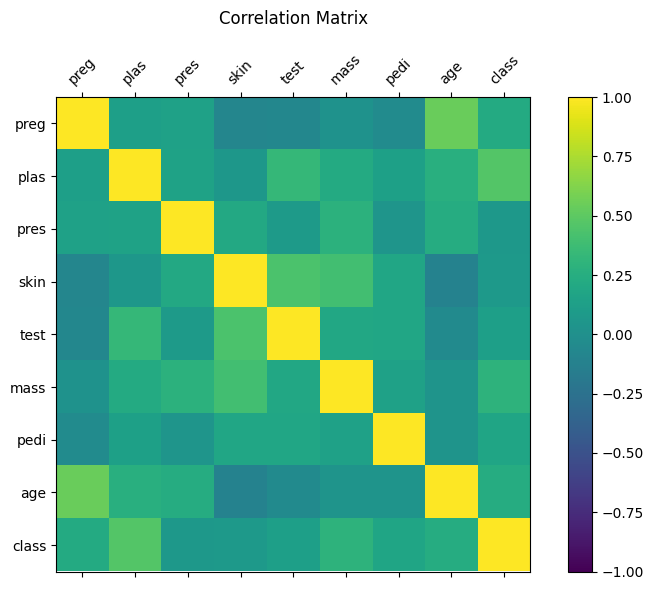

In [54]:
# Compute correlation matrix
correlations = data.corr()

# Plot correlation matrix
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Axis ticks and labels
ticks = np.arange(len(names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45)
ax.set_yticklabels(names)

plt.title("Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13264\3639812414.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


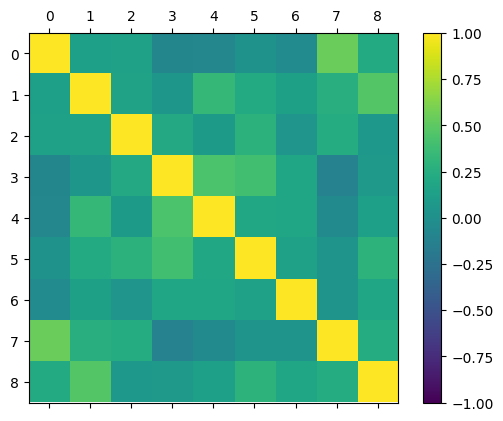

In [55]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
fig.show()


## Scatterplot Matrix

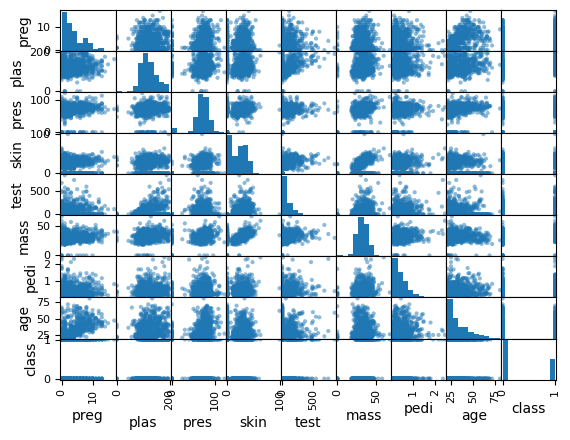

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## Prepare Your Data For Machine Learning

 1. Rescale data.

 2. Standardize data.

 3. Normalize data.
 
 4. Binarize data

## Data PreProcessing
1. Fit and Multiple Transform
2. Combined Fit and Transform

## Rescale Data

In [57]:
# to convert the dataframe into an array
array=data.values

In [58]:
X=array[:,0:8]
y= array[:,8]

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)

In [60]:
np.set_printoptions(precision=3)

In [61]:
print(np.round(X_scaled[:5], 3))

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## Standardize Data
 Standardization is a useful technique to transform attributes with a Gaussian distribution and
 di ering means and standard deviations to a standard Gaussian distribution with a mean of
 0 and a standard deviation of 1.

In [62]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
X_stand=stand.fit_transform(X)
print(np.round(X_stand[:5],3))

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Normalize Data

a normalizer is a preprocessing technique used to scale input features individually so that they have a unit norm (length = 1). It is especially useful when you're working with sparse or vector-based data and algorithms that rely on distance or angle between data points — such as K-Nearest Neighbors (KNN), SVMs, or Neural Networks.

### Difference between Normalizer and Normalization?
= the difference is that one is row wise ad another is column wise operation

In [63]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
X_stand=stand.fit_transform(X)
print(np.round(X_stand[:5],3))

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Binarize Data
You can transform your data using a binary threshold. All values above the threshold are
marked 1 and all equal to or below are marked as 0. This is called binarizing your data or
thresholding your data.

In [64]:
from sklearn.preprocessing import Binarizer
bin=Binarizer()
X_bin=bin.fit_transform(X)
print(np.round(X_stand[:5],3))

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


# Chapter 8

## Feature selection
1. Univariate Selection
2. Recursive Feature Elimination
3. Principal Component Analysis
4. Feature Importance

## Univariate Selection
Univariate Feature Selection is a technique for selecting the best features based on statistical tests. It evaluates each feature individually (hence "univariate") and selects the ones that have the strongest relationship with the target variable.


Classification problems → using ANOVA F-test, chi-squared test, etc.

Regression problems → using F-test for regression, mutual information, etc

| Term                     | Description                                                             |
| ------------------------ | ----------------------------------------------------------------------- |
| **Univariate Selection** | Feature selection using individual feature scoring                      |
| **SelectKBest**          | Selects the top **k** features with the highest scores                  |
| **Score Function**       | Statistical method (e.g., chi-squared, ANOVA) used for ranking features |


In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
print(features[0:5, :])


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


##  Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which  attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)
print("Selected Features (True means selected):", fit.support_)
print("Feature Ranking (1 = best):", fit.ranking_)

Selected Features (True means selected): [ True False False False False  True  True False]
Feature Ranking (1 = best): [1 2 4 5 6 1 1 3]


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [70]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
fit=pca.fit(X)
print("Explained Variance: %s" % fit.explained_variance_ratio_) 
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


## Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.You can see that we are given an importance score for each attribute where the larger the
 score, the more important the attribute. 

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.105 0.237 0.099 0.081 0.076 0.136 0.12  0.147]


# Chapter 9

## Evaluate Machine Learning Algorithms
-Train and Test Sets.

-k-fold Cross Validation.

-Leave One Out Cross Validation.

-Repeated Random Test-Train Splits.

### Split into Train and Test Sets

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f" % result)    

Accuracy: 0.825


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-fold Cross Validation
 Cross validation is an approach that you can use to estimate the performance of a machine
 learning algorithm with less variance than a single train-test set split. It works by splitting
 the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The
 algorithm is trained on k 1 folds with one held back and tested on the held back fold. This is
 repeated so that each fold of the dataset is given a chance to be the held back test set. After
 running cross validation you end up with k di erent performance scores that you can summarize
 using a mean and a standard deviation.
 The result is a more reliable estimate of the performance of the algorithm on new data. It is
 more accurate because the algorithm is trained and evaluated multiple times on different data.

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

Accuracy: 77.734% (4.605%)


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

## Leave One Out Cross Validation